# sklearn
This is a machine learning library.

**Setup**

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 80)        # number of characters per row

## The Library
sklearn **does not automatically import its subpackages**. Therefore all subpakcages must be specifically loaded before use.

In [56]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.metrics
import statsmodels.formula.api as smf

## Sample Data
Generate 100 rows of data, with 3x features (X1,X2,X3), and one dependant variable (Y)

In [53]:
n = 100  # number of samples
I = 5  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.shape

(100, 4)

In [54]:
mydf.head()

   X1  X2  X3     Y
0  50   1  19  33.9
1  70  96  64  59.4
2  27  10  62  47.3
3  95  89  60  67.3
4  50  77  41  44.7

## Data Splitting

### Method 1: Split One Dataframe Into Train/Test

```
traindf, testdf = train_test_split( df, test_size=, random_state= ) 
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

In [74]:
traindf, testdf = train_test_split(mydf,test_size=0.2, random_state=25)

In [63]:
print (len(traindf))
print (len(testdf))

80
20


### Method 2: DataFrame in X,Y, split into x_train/test, y_train/test
```
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=, random_state= )
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

**Split DataFrame into X and Y First**

In [69]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

**Then Split X/Y into x_train/test, y_train/test**

In [73]:
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=25)
print (len(x_train))
print (len(x_test))

80
20


# Linear Regression

## The Math

## Sample Data

### Data Emulation

In [19]:
n = 200  # number of samples
I = 250  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I

**Put All Data In pandas DataFrame**

In [20]:
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.head()

    X1   X2   X3      Y
0    9    4   45  284.2
1  159   42  142  334.9
2   81  159   40  307.9
3   88   56  145  317.5
4  129   53  167  335.6

## Data Preprocessing

The aim is to produce:  
  
X : Test dataframe with feature column(s)  
Y : Test dataframe column of actual value

### Preparing Features and Predicted Value

In [21]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

### Splitting Data Into Training and Test Sets

In [22]:
trainX,testX,trainY,testY = sk.model_selection.train_test_split(X,Y,test_size=0.2)

In [23]:
train, test = sklearn.model_selection.train_test_split(mydf, test_size=0.2)

In [24]:
len(train)

160

In [25]:
len(test)

40

### Data Validation

Ensure there is **no col-linearity** among the features used

#### Colleration Check

In [26]:
X.corr()

          X1        X2        X3
X1  1.000000  0.078151 -0.038544
X2  0.078151  1.000000 -0.030480
X3 -0.038544 -0.030480  1.000000

#### Matrix Scatter Plot

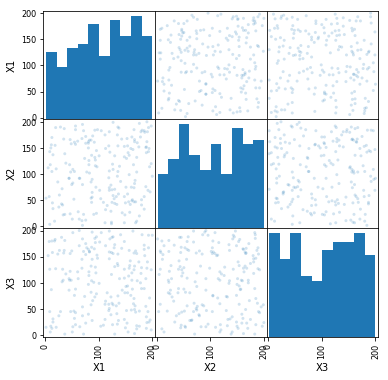

In [27]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='hist');

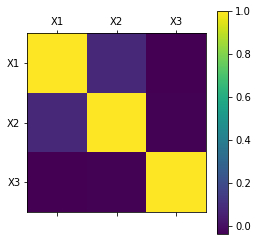

In [28]:
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

## Modelling (scikit-learn)

### Create The Model

In [29]:
lm = sklearn.linear_model.LinearRegression()   # create linear regression object
lm.fit( trainX, trainY )  # train the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Modelling (statsmodel)

### Create The Model
#### Model From Single DataFrame

In [30]:
fit = smf.ols('Y ~ X1 + X2 + X3', data=mydf).fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     919.0
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          3.90e-115
Time:                        17:52:37   Log-Likelihood:                -629.17
No. Observations:                 200   AIC:                             1266.
Df Residuals:                     196   BIC:                             1280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    261.7057      1.338    195.627      0.0

#### Model From Multiple Numpy Array

In [31]:
fit2 = smf.OLS(trainY, trainX).fit()
print (fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     887.6
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           3.34e-98
Time:                        17:52:37   Log-Likelihood:                -920.48
No. Observations:                 160   AIC:                             1847.
Df Residuals:                     157   BIC:                             1856.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.9038      0.089     10.174      0.0

In [32]:
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     919.0
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          3.90e-115
Time:                        17:52:37   Log-Likelihood:                -629.17
No. Observations:                 200   AIC:                             1266.
Df Residuals:                     196   BIC:                             1280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    261.7057      1.338    195.627      0.0

### Model Analysis

**Intercept Value**

In [33]:
lm.intercept_

261.37605127067371

**Co-Efficients**

In [34]:
lm.coef_

array([ 0.10491843,  0.18814241,  0.29484898])

In [35]:
zip(feature_cols, lm.coef_)

In [36]:
lm.score( trainX, trainY )

0.93186809571369578

### Test Data Prediction

In [37]:
predY = lm.predict( testX )

### Model Performance Against Test Data

#### Mean Absolute Error (MAE)

In [38]:
sklearn.metrics.mean_absolute_error( testY, predY )

5.277662385714291

#### Mean Squared Error (MSE)

In [39]:
sklearn.metrics.mean_squared_error( testY, predY )

35.931576062668896

#### Root Mean Squared Error (RMSE)

In [40]:
math.sqrt( sklearn.metrics.mean_squared_error( testY, predY ) )

5.994295293249149

#### R-Squared

In [41]:
sklearn.metrics.r2_score( testY, predY )

0.93789092245417649

## Prediction

### Performance

In [42]:
lm.predict( testX )

array([ 327.85689378,  309.45918273,  308.76349487,  287.16521353,
        355.12936599,  276.3410909 ,  298.5572378 ,  309.52913021,
        299.24715092,  304.99267129,  358.46773539,  337.70868483,
        327.89214996,  329.43978023,  318.57933556,  302.92609927,
        321.14400013,  302.90808298,  315.81802279,  348.10128076,
        295.42591025,  340.18910104,  371.59549508,  326.56208738,
        348.00876688,  295.7639486 ,  343.83380356,  360.2987305 ,
        320.43329049,  317.63715014,  351.20114756,  321.9189296 ,
        345.251173  ,  298.41757465,  290.22243482,  357.093608  ,
        317.49223922,  348.85927173,  329.24227276,  305.0306508 ])

## Feature Selection

The advantage of using skcikit-learn package is that it has this particular method selection, works more or less like backward selection (not exactly), and is called **Recursive Feature**. How it works:

- Model run with all variables, weight is assigned to each variable
- Variable with smallest weight will be pruned from next iteration
- Run the model again till the number of desired features is left

### The Library

In [43]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [44]:
estimator = SVR(kernel='linear')       # we are using linear model
selector = RFE (estimator, 2, step=1)  # we want just 2 features
selector = selector.fit(X,Y)           # execute

In [45]:
selector.support_

array([False,  True,  True], dtype=bool)

In [46]:
selector.ranking_

array([2, 1, 1])

In [47]:
selector.estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)